# IMPORT DEPENDENCIES

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

# CLASSIFYING 
- Directors, duration, year, budget, genre

In [2]:
# Import the data 
movies = pd.read_csv("../Resources/imdb_final.csv")
movies.head()

,imdb_title_id,title,year,genre,duration,country,director,production_company,budget,total_votes,...,allover45,males,males18to29,males30to44,malesover45,females,females18to29,females30to44,femalesover45,rating_class
0,tt0035423,Kate & Leopold,2001,Comedy,118,USA,James Mangold,Konrad Pictures,48000000,75298,...,6.4,6.3,6.5,6.2,6.3,6.6,6.7,6.4,6.7,Good
1,tt0113026,The Fantasticks,2000,Musical,86,USA,Michael Ritchie,Michael Ritchie Productions,10000000,1082,...,5.4,5.3,5.4,5.4,5.3,5.7,5.6,5.8,5.6,Good
2,tt0118589,Glitter,2001,Drama,104,USA,Vondie Curtis-Hall,Twentieth Century Fox,22000000,20959,...,2.1,1.9,2.1,1.9,2.0,2.9,3.2,2.7,2.5,Bad
3,tt0118652,The Attic Expeditions,2001,Comedy,100,USA,Jeremy Kasten,Tse Tse Fly Productions,1000000,1588,...,4.6,5.0,4.7,5.1,4.6,4.8,5.8,4.6,4.6,Good
4,tt0120467,Vulgar,2000,Crime,87,USA,Bryan Johnson,Chango Productions,120000,3852,...,5.0,5.3,6.1,5.3,5.1,5.2,5.2,5.3,4.6,Good


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 23 columns):
imdb_title_id         5060 non-null object
title                 5060 non-null object
year                  5060 non-null int64
genre                 5060 non-null object
duration              5060 non-null int64
country               5060 non-null object
director              5060 non-null object
production_company    5060 non-null object
budget                5060 non-null int64
total_votes           5060 non-null int64
median_vote           5060 non-null float64
all18to29             5060 non-null float64
all30to44             5060 non-null float64
allover45             5060 non-null float64
males                 5060 non-null float64
males18to29           5060 non-null float64
males30to44           5060 non-null float64
malesover45           5060 non-null float64
females               5060 non-null float64
females18to29         5060 non-null float64
females30to44         5060 

In [4]:
target = movies["rating_class"]
target_names = ["Bad", "Excellent", "Good"]

In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(target)

LabelEncoder()

In [6]:
data = movies[["year", "duration","budget"]]
features_names = data.columns
data.head()

,year,duration,budget
0,2001,118,48000000
1,2000,86,10000000
2,2001,104,22000000
3,2001,100,1000000
4,2000,87,120000


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

/Users/alexispalmer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test)) 

Test Acc: 0.643


In [10]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.41      0.08      0.14       280
   Excellent       0.00      0.00      0.00       161
        Good       0.66      0.96      0.78       824

    accuracy                           0.64      1265
   macro avg       0.36      0.35      0.31      1265
weighted avg       0.52      0.64      0.54      1265



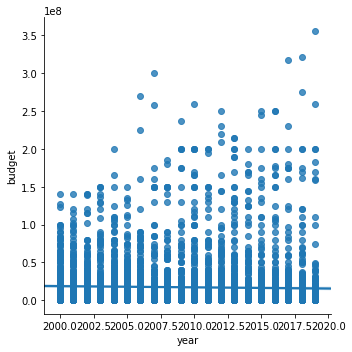

In [11]:
# scatter plot with regression  
# line(by default) 
sns.lmplot(x ='year', y ='budget', data = movies) 
  
# Show the plot 
plt.show() 

In [12]:
data_set = movies[["year", "duration", "genre", "director", "budget", "rating_class"]]
df = pd.DataFrame(data_set)
print (df)

      year  duration    genre            director    budget rating_class
0     2001       118   Comedy       James Mangold  48000000         Good
1     2000        86  Musical     Michael Ritchie  10000000         Good
2     2001       104    Drama  Vondie Curtis-Hall  22000000          Bad
3     2001       100   Comedy       Jeremy Kasten   1000000         Good
4     2000        87    Crime       Bryan Johnson    120000         Good
...    ...       ...      ...                 ...       ...          ...
5055  2019        84   Comedy           Jon Lucas   5000000    Excellent
5056  2019        94    Drama         Dan Sallitt     95000         Good
5057  2019        84   Action        Glenn Miller    100000          Bad
5058  2019        92   Action        Keoni Waxman   3000000         Good
5059  2019        77   Horror    Robin Entreinger    500000          Bad

[5060 rows x 6 columns]


In [13]:
target = df['rating_class']
target_names = ["Bad", "Excellent", "Good"]

In [14]:
data = df.copy()
data

,year,duration,genre,director,budget,rating_class
0,2001,118,Comedy,James Mangold,48000000,Good
1,2000,86,Musical,Michael Ritchie,10000000,Good
2,2001,104,Drama,Vondie Curtis-Hall,22000000,Bad
3,2001,100,Comedy,Jeremy Kasten,1000000,Good
4,2000,87,Crime,Bryan Johnson,120000,Good
...,...,...,...,...,...,...
5055,2019,84,Comedy,Jon Lucas,5000000,Excellent
5056,2019,94,Drama,Dan Sallitt,95000,Good
5057,2019,84,Action,Glenn Miller,100000,Bad
5058,2019,92,Action,Keoni Waxman,3000000,Good


In [15]:
# Dummy Encoding for genre column
data_binary_encoded = pd.get_dummies(df, columns= ["genre", "director"])
data_binary_encoded.head()

,year,duration,budget,rating_class,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,Good,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,Good,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,Bad,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,Good,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,Good,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
info = data_binary_encoded.drop('rating_class', axis=1)
features_names = info.columns
info.head()

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
label_encoder = LabelEncoder()
label_encoder.fit(target)

LabelEncoder()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(info, target, random_state=42)

In [19]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

/Users/alexispalmer/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.628


In [23]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.32      0.12      0.18       280
   Excellent       0.14      0.01      0.02       161
        Good       0.66      0.92      0.77       824

    accuracy                           0.63      1265
   macro avg       0.38      0.35      0.32      1265
weighted avg       0.52      0.63      0.54      1265

